In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

     PassengerId  Survived  Pclass                           Name     Sex  \
4              5         0       3       Allen, Mr. William Henry    male   
730          731         1       1  Allen, Miss. Elisabeth Walton  female   

      Age  SibSp  Parch  Ticket      Fare Cabin Embarked  
4    35.0      0      0  373450    8.0500   NaN        S  
730  29.0      0      0   24160  211.3375    B5        S  


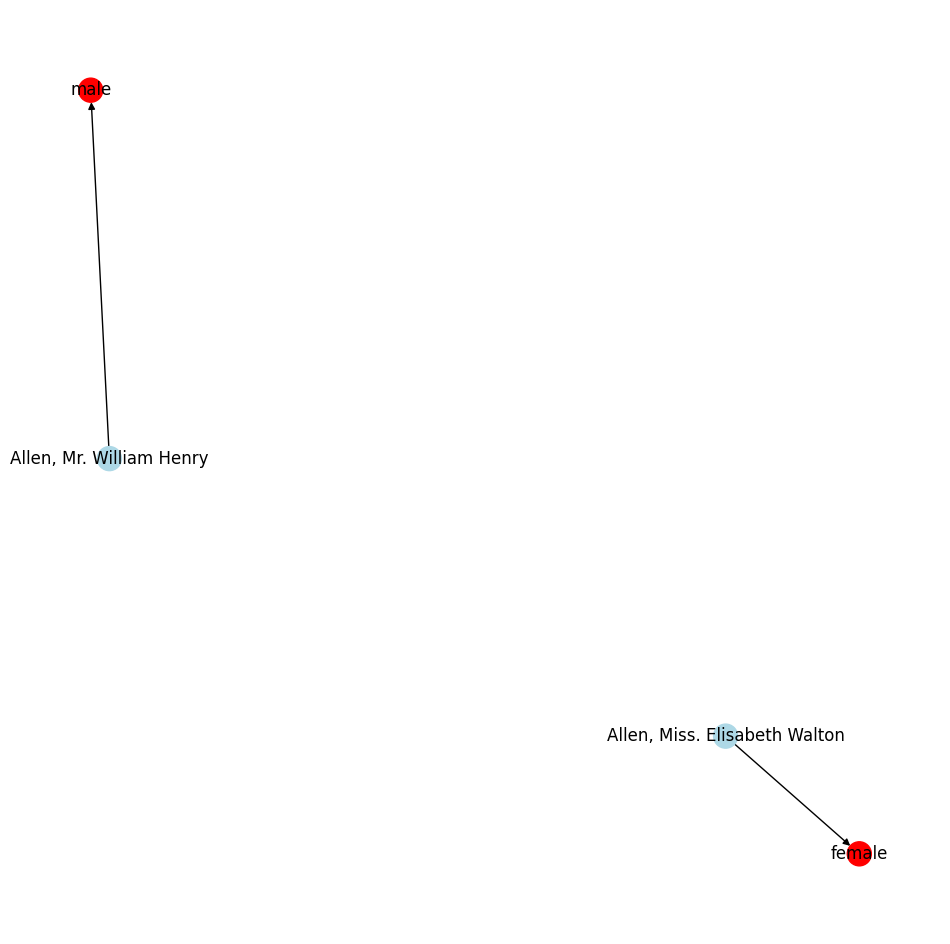

In [9]:
Data = pd.read_csv('Titanic.csv')

def por_genero(nombre):
    global Data  # Indica que Data es una variable global
    Data = Data[Data['Name'].str.match(nombre)==True]
    print(Data)

    fig, ax = plt.subplots(figsize =(12,12))

    DG = nx.DiGraph()
    for i in range(0, len(Data)):
        DG.add_edge(Data.iloc[i]['Name'], Data.iloc[i]['Sex'])
        i = i + 1 
    genero = ["male", "female"]
    nx.draw(DG, with_labels=True, node_color= ['red' if node in genero else 'lightblue' for node in DG.nodes()])
    plt.show()

def por_clase(nombre):
    global Data  # Indica que Data es una variable global
    Data = Data[Data['Name'].str.match(nombre)==True]
    print(Data)

    fig, ax = plt.subplots(figsize =(12,12))

    DG = nx.DiGraph()
    for i in range(0, len(Data)):
        DG.add_edge(Data.iloc[i]['Name'], Data.iloc[i]['Pclass'])
        i = i + 1 
    clase = ["1", "2", "3"]
    nx.draw(DG, with_labels=True, node_color= ['red' if node in clase else 'lightblue' for node in DG.nodes()])
    plt.show()

def por_supervivencia(nombre):
    print('En construcción')

nombre = "^" + input('Ingrese el apellido que desea buscar:').capitalize() + ".*"

menu = int(input('Elija el parámetro de búsqueda (número de la opción):\n1. Por género\n2. Por clase\n3. Por supervivencia'))

if(menu == 1):
    por_genero(nombre)
elif(menu == 2):
    por_clase(nombre)
else:
    por_supervivencia(nombre)
